In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
import seaborn as sns
import io
fontsize=15

data = pd.read_csv('../data/5cm.csv')

mu_0 = 4 * np.pi * 10**(-7) # H/m

In [2]:
def remove_unnamed(df):
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    return df

data = remove_unnamed(data)

In [3]:
data['r (m)'] = data['r (cm)'] / 100
data['dr (m)'] = data['dr (cm)'] / 100

In [4]:
mu_0 = 4 * np.pi * 10**(-7)
N = 124 # number of turns
a = 0.15 # metres [coil separation]
k = (8 * mu_0 * N) / (np.sqrt(125) * a)

# e/m measurement

## diameter = 0.1 m

In [5]:
data5 = data.query('`r (m)` == 0.05').reset_index(drop=True).copy()
data5['B (T)'] = k * data5['I_H (A)']
data5['dB (T)'] = k * data5['d I_H(A)']
data5['r^2 B^2 (m^2 T^2)'] = data5['r (m)'].values**2 * data5['B (T)'].values**2
data5['d r^2 B^2 (m^2 T^2)'] = 2 * np.sqrt((data5['dr (m)'] / data5['r (m)'])**2 + (data5['dB (T)'] / data5['B (T)'])**2)

6.958133501650681e-12 -1.6156465883986298e-09
143716702153.35327


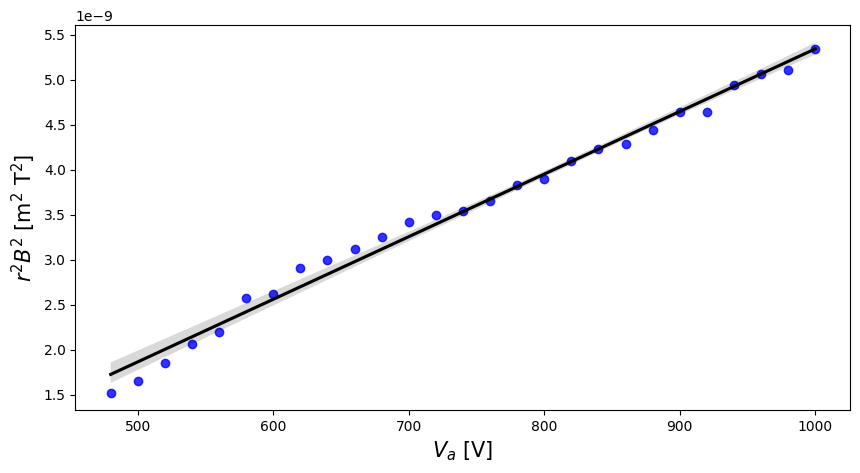

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.regplot(
    x=2*data5['V_a (V)'], 
    y=data5['r^2 B^2 (m^2 T^2)'],
    ax=ax,
    color='blue',
    line_kws={'color': 'k'}
)
ax.set_ylabel(r'$r^2 B^2$ [m$^2$ T$^2$]', fontsize=fontsize)
ax.set_xlabel(r'$V_a$ [V]', fontsize=fontsize)
plt.savefig('../tex/figures/em5cm.png', bbox_inches='tight')
slope5, intercept, _, _, _ = linregress(2*data5['V_a (V)'], data5['r^2 B^2 (m^2 T^2)'])
print(slope5, intercept)
print(1/slope5)
plt.show()

In [7]:
def linear_func(x, m, c):
    return x * m + c

popt, pcov = curve_fit(linear_func, 2*data5['V_a (V)'], data5['r^2 B^2 (m^2 T^2)'])
slope, intercept = popt[0], popt[1]
std_err_slope = np.sqrt(pcov[0, 0])
print(slope, std_err_slope)


6.9581335016506805e-12 1.4365812360099837e-13


## diameter = 0.08 m

In [8]:
data4 = data.query('`r (m)` == 0.04').reset_index(drop=True).copy()
data4['B (T)'] = k * data4['I_H (A)']
data4['r^2 B^2 (m^2 T^2)'] = data4['r (m)'].values**2 * data4['B (T)'].values**2
data4

,V_a (V),d V_a (V),I_H (A),d I_H(A),r (cm),dr (cm),r (m),dr (m),B (T),r^2 B^2 (m^2 T^2)
0,500,2,2.4244,0.0004,4,0.05,0.04,0.0005,0.001802,5.196119e-09
1,490,2,2.3933,0.0010,4,0.05,0.04,0.0005,0.001779,5.063663e-09
2,480,2,2.3750,0.0010,4,0.05,0.04,0.0005,0.001765,4.986522e-09
3,470,2,2.3421,0.0001,4,0.05,0.04,0.0005,0.001741,4.849326e-09
4,460,2,2.3317,0.0004,4,0.05,0.04,0.0005,0.001733,4.806355e-09
5,450,2,2.2939,0.0002,4,0.05,0.04,0.0005,0.001705,4.651783e-09
6,440,2,2.2565,0.0002,4,0.05,0.04,0.0005,0.001677,4.501334e-09
7,430,2,2.2353,0.0003,4,0.05,0.04,0.0005,0.001662,4.417150e-09
8,420,2,2.1965,0.0002,4,0.05,0.04,0.0005,0.001633,4.265137e-09
9,410,2,2.1795,0.0002,4,0.05,0.04,0.0005,0.001620,4.199371e-09


6.700278778466742e-12 -1.3640641114233448e-09
149247521344.0052


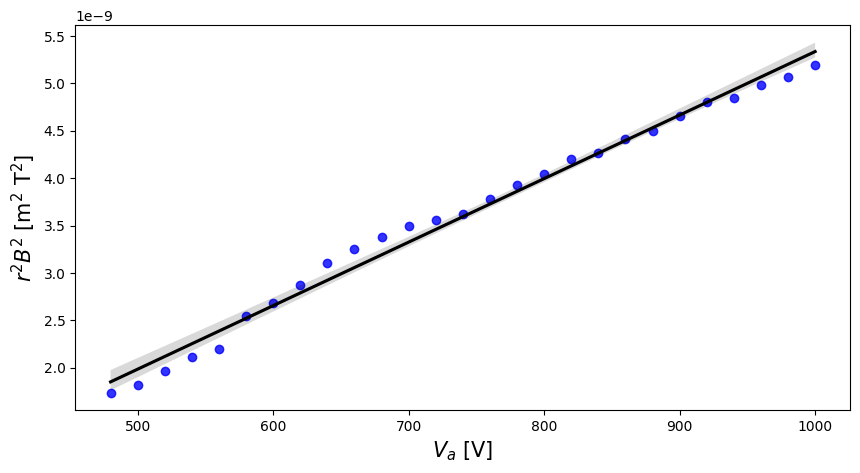

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.regplot(
    x=2*data4['V_a (V)'], 
    y=data4['r^2 B^2 (m^2 T^2)'],
    ax=ax,
    color='blue',
    line_kws={'color': 'k'}
)
ax.set_ylabel(r'$r^2 B^2$ [m$^2$ T$^2$]', fontsize=fontsize)
ax.set_xlabel(r'$V_a$ [V]', fontsize=fontsize)
plt.savefig('../tex/figures/em4cm.png', bbox_inches='tight')
slope4, intercept, _, _, _ = linregress(2*data4['V_a (V)'], data4['r^2 B^2 (m^2 T^2)'])
print(slope4, intercept)
print(1/slope4)
plt.show()

## diameter = 0.06 m

In [10]:
data3 = data.query('`r (m)` == 0.03').reset_index(drop=True).copy()
display(data3)
data3['B (T)'] = k * data3['I_H (A)']
data3['dB (T)'] = k * data3['d I_H(A)']
data3['r^2 B^2 (m^2 T^2)'] = data3['r (m)'].values**2 * data3['B (T)'].values**2
data3

,V_a (V),d V_a (V),I_H (A),d I_H(A),r (cm),dr (cm),r (m),dr (m)
0,450,2,2.7439,0.0001,3,0.05,0.03,0.0005
1,440,2,2.7169,0.0010,3,0.05,0.03,0.0005
2,430,2,2.6718,0.0001,3,0.05,0.03,0.0005
3,420,2,2.6183,0.0001,3,0.05,0.03,0.0005
4,410,2,2.5797,0.0001,3,0.05,0.03,0.0005
5,400,2,2.5075,0.0001,3,0.05,0.03,0.0005
6,390,2,2.4645,0.0002,3,0.05,0.03,0.0005
7,380,2,2.3960,0.0005,3,0.05,0.03,0.0005
8,370,2,2.3448,0.0002,3,0.05,0.03,0.0005
9,360,2,2.3202,0.0010,3,0.05,0.03,0.0005


,V_a (V),d V_a (V),I_H (A),d I_H(A),r (cm),dr (cm),r (m),dr (m),B (T),dB (T),r^2 B^2 (m^2 T^2)
0,450,2,2.7439,0.0001,3,0.05,0.03,0.0005,0.002040,7.433191e-08,3.743946e-09
1,440,2,2.7169,0.0010,3,0.05,0.03,0.0005,0.002020,7.433191e-07,3.670628e-09
2,430,2,2.6718,0.0001,3,0.05,0.03,0.0005,0.001986,7.433191e-08,3.549776e-09
3,420,2,2.6183,0.0001,3,0.05,0.03,0.0005,0.001946,7.433191e-08,3.409038e-09
4,410,2,2.5797,0.0001,3,0.05,0.03,0.0005,0.001918,7.433191e-08,3.309264e-09
5,400,2,2.5075,0.0001,3,0.05,0.03,0.0005,0.001864,7.433191e-08,3.126619e-09
6,390,2,2.4645,0.0002,3,0.05,0.03,0.0005,0.001832,1.486638e-07,3.020304e-09
7,380,2,2.3960,0.0005,3,0.05,0.03,0.0005,0.001781,3.716595e-07,2.854741e-09
8,370,2,2.3448,0.0002,3,0.05,0.03,0.0005,0.001743,1.486638e-07,2.734039e-09
9,360,2,2.3202,0.0010,3,0.05,0.03,0.0005,0.001725,7.433191e-07,2.676972e-09


5.3947118424410156e-12 -1.1599249226499631e-09
185366712663.47324


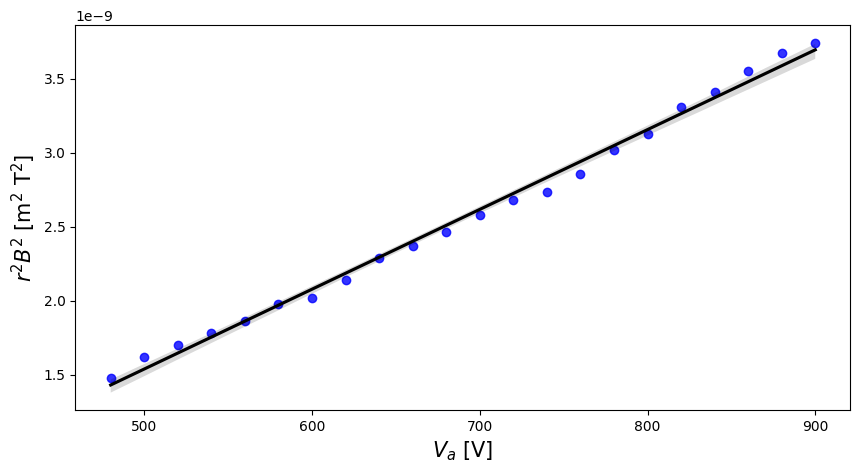

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.regplot(
    x=2*data3['V_a (V)'], 
    y=data3['r^2 B^2 (m^2 T^2)'],
    ax=ax,
    color='blue',
    line_kws={'color': 'k'}
)
ax.set_ylabel(r'$r^2 B^2$ [m$^2$ T$^2$]', fontsize=fontsize)
ax.set_xlabel(r'$V_a$ [V]', fontsize=fontsize)
plt.savefig('../tex/figures/em3cm.png', bbox_inches='tight')
slope3, intercept, _, _, _ = linregress(2*data3['V_a (V)'], data3['r^2 B^2 (m^2 T^2)'])
print(slope3, intercept)
print(1/slope3)
plt.show()

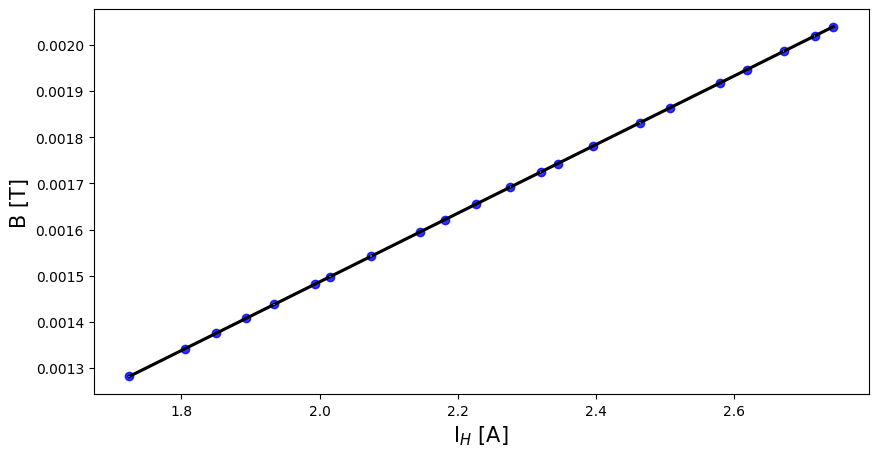

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.regplot(
    x=data3['I_H (A)'],
    y=data3['B (T)'],
    color='blue',
    line_kws={'color': 'k'},
    ax=ax,
)
ax.errorbar(
    data3['I_H (A)'],
    data3['B (T)'],
    fmt='none',
    xerr=data3['d I_H(A)'],
    yerr=data3['dB (T)']
)
ax.set_xlabel(r'I$_H$ [A]', fontsize=fontsize)
ax.set_ylabel(r'B [T]', fontsize=fontsize)
plt.savefig('../tex/figures/BvI_6cm.png', bbox_inches='tight')

In [13]:
em5 = 1 / slope5
em4 = 1 / slope4
em3 = 1 / slope3
average_em = np.mean([em5, em4, em3])
print(f'Average e/m measurement: {average_em}')
print(em5, em4, em3)

Average e/m measurement: 159443645386.94388
143716702153.35327 149247521344.0052 185366712663.47324


# Thermionic emission

In [14]:
positive = pd.read_csv('../data/positive_anode_connection.csv')
negative = pd.read_csv('../data/negative_anode_connection.csv')

for df in [positive, negative]:
    df['I (A)'] = df['I (mA)'] / 1000
    df['dI (A)'] = df['dI (mA)'] / 1000
    display(df)

,V (V),dV (V),I (mA),dI (mA),I (A),dI (A)
0,0.001,0.003,0.0086,0.0001,0.000009,1.000000e-07
1,5.350,0.010,0.4612,0.0005,0.000461,5.000000e-07
2,10.043,0.002,0.9907,0.0003,0.000991,3.000000e-07
3,15.087,0.001,1.8264,0.0002,0.001826,2.000000e-07
4,19.879,0.001,2.8418,0.0001,0.002842,1.000000e-07
5,25.133,0.001,4.1371,0.0003,0.004137,3.000000e-07
6,29.922,0.001,5.4439,0.0003,0.005444,3.000000e-07
7,34.751,0.010,6.8651,0.0005,0.006865,5.000000e-07
8,39.721,0.001,8.4129,0.0002,0.008413,2.000000e-07
9,44.488,0.003,9.9814,0.0007,0.009981,7.000000e-07


,V (V),dV (V),I (mA),dI (mA),I (A),dI (A)
0,-0.143,0.001,0.0058,0.0001,5.800000e-06,1.000000e-07
1,-5.307,0.001,-0.0006,0.0001,-6.000000e-07,1.000000e-07
2,-10.174,0.001,-0.0011,0.0001,-1.100000e-06,1.000000e-07
3,-14.977,0.002,-0.0015,0.0001,-1.500000e-06,1.000000e-07
4,-19.966,0.001,-0.0022,0.0001,-2.200000e-06,1.000000e-07
5,-25.303,0.001,-0.0028,0.0002,-2.800000e-06,2.000000e-07
6,-29.955,0.005,-0.0033,0.0001,-3.300000e-06,1.000000e-07
7,-34.508,0.001,-0.0039,0.0001,-3.900000e-06,1.000000e-07
8,-39.722,0.001,-0.0044,0.0001,-4.400000e-06,1.000000e-07
9,-44.620,0.001,-0.0050,0.0002,-5.000000e-06,2.000000e-07


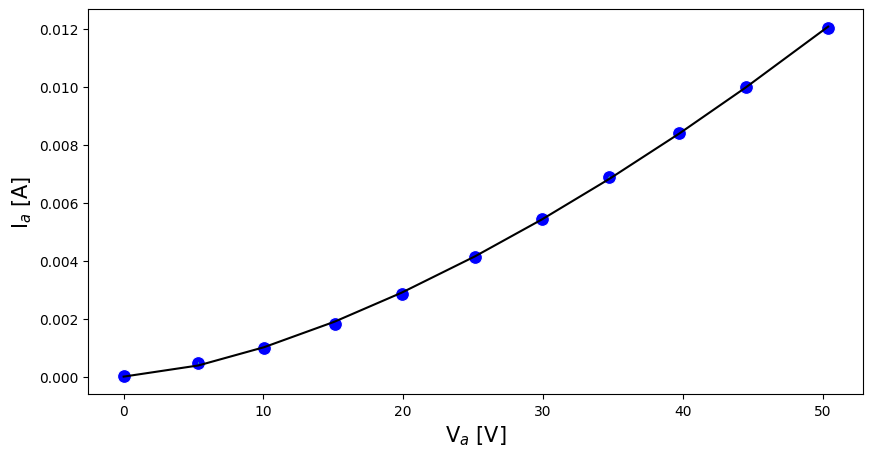

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(
    data=positive,
    x='V (V)',
    y='I (A)',
    color='blue',
    ax=ax,
    s=100
)
ax.errorbar(
    positive['V (V)'],
    positive['I (A)'],
    xerr=positive['dV (V)'],
    yerr=positive['dI (A)'],
    # capsize=15,
    fmt='none',
)
ax.set_xlabel(r'V$_a$ [V]', fontsize=fontsize)
ax.set_ylabel(r'I$_a$ [A]', fontsize=fontsize)

def power_law(x, c, k):
    return c * (x**k)

params, covariance = curve_fit(power_law, positive['V (V)'], positive['I (A)'])
c_fit, k_fit = params
ax.plot(
    positive['V (V)'],
    power_law(positive['V (V)'], c_fit, k_fit),
    c='k'
)
plt.savefig('../tex/figures/thermionic_emission_run_1.png', bbox_inches='tight')

In [16]:
c_fit, k_fit

(np.float64(2.9348634957442664e-05), np.float64(1.5354845714163845))

<Axes: xlabel='V (V)', ylabel='I (A)'>

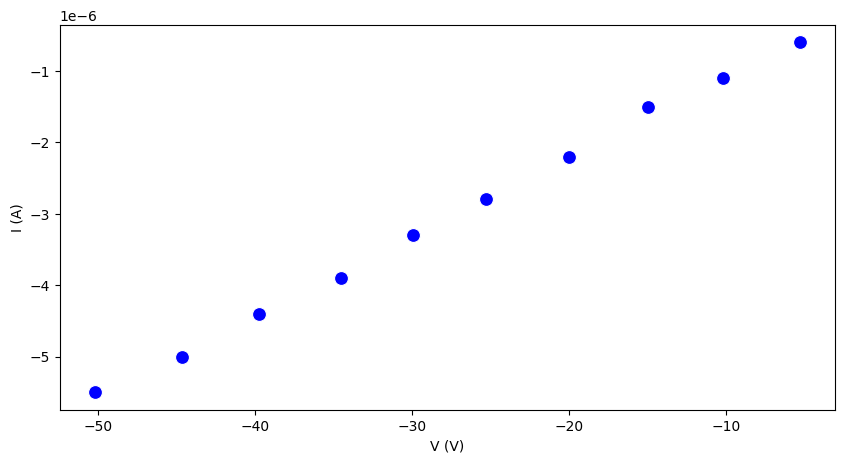

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(
    x=negative['V (V)'][1:],
    y=negative['I (A)'][1:],
    color='blue',
    ax=ax,
    s=100
)
# ax.set_yscale('log')